In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
objects = ['jet_1', 'jet_2', 'jet_3', 'jet_4', 'lepton_1', 'lepton_2']
features = ['E', 'p_T', 'eta', 'phi']

# Training dataset

In [10]:
columns = ['MET', 'METphi'] + [f'{o}_{f}' for o in objects for f in features] + ['dropme']

In [3]:
data = pd.read_csv('ttb.csv', header=None, sep=' ', names=columns)
data.drop(columns=['dropme'], inplace=True)

In [4]:
data.shape

(1278239, 26)

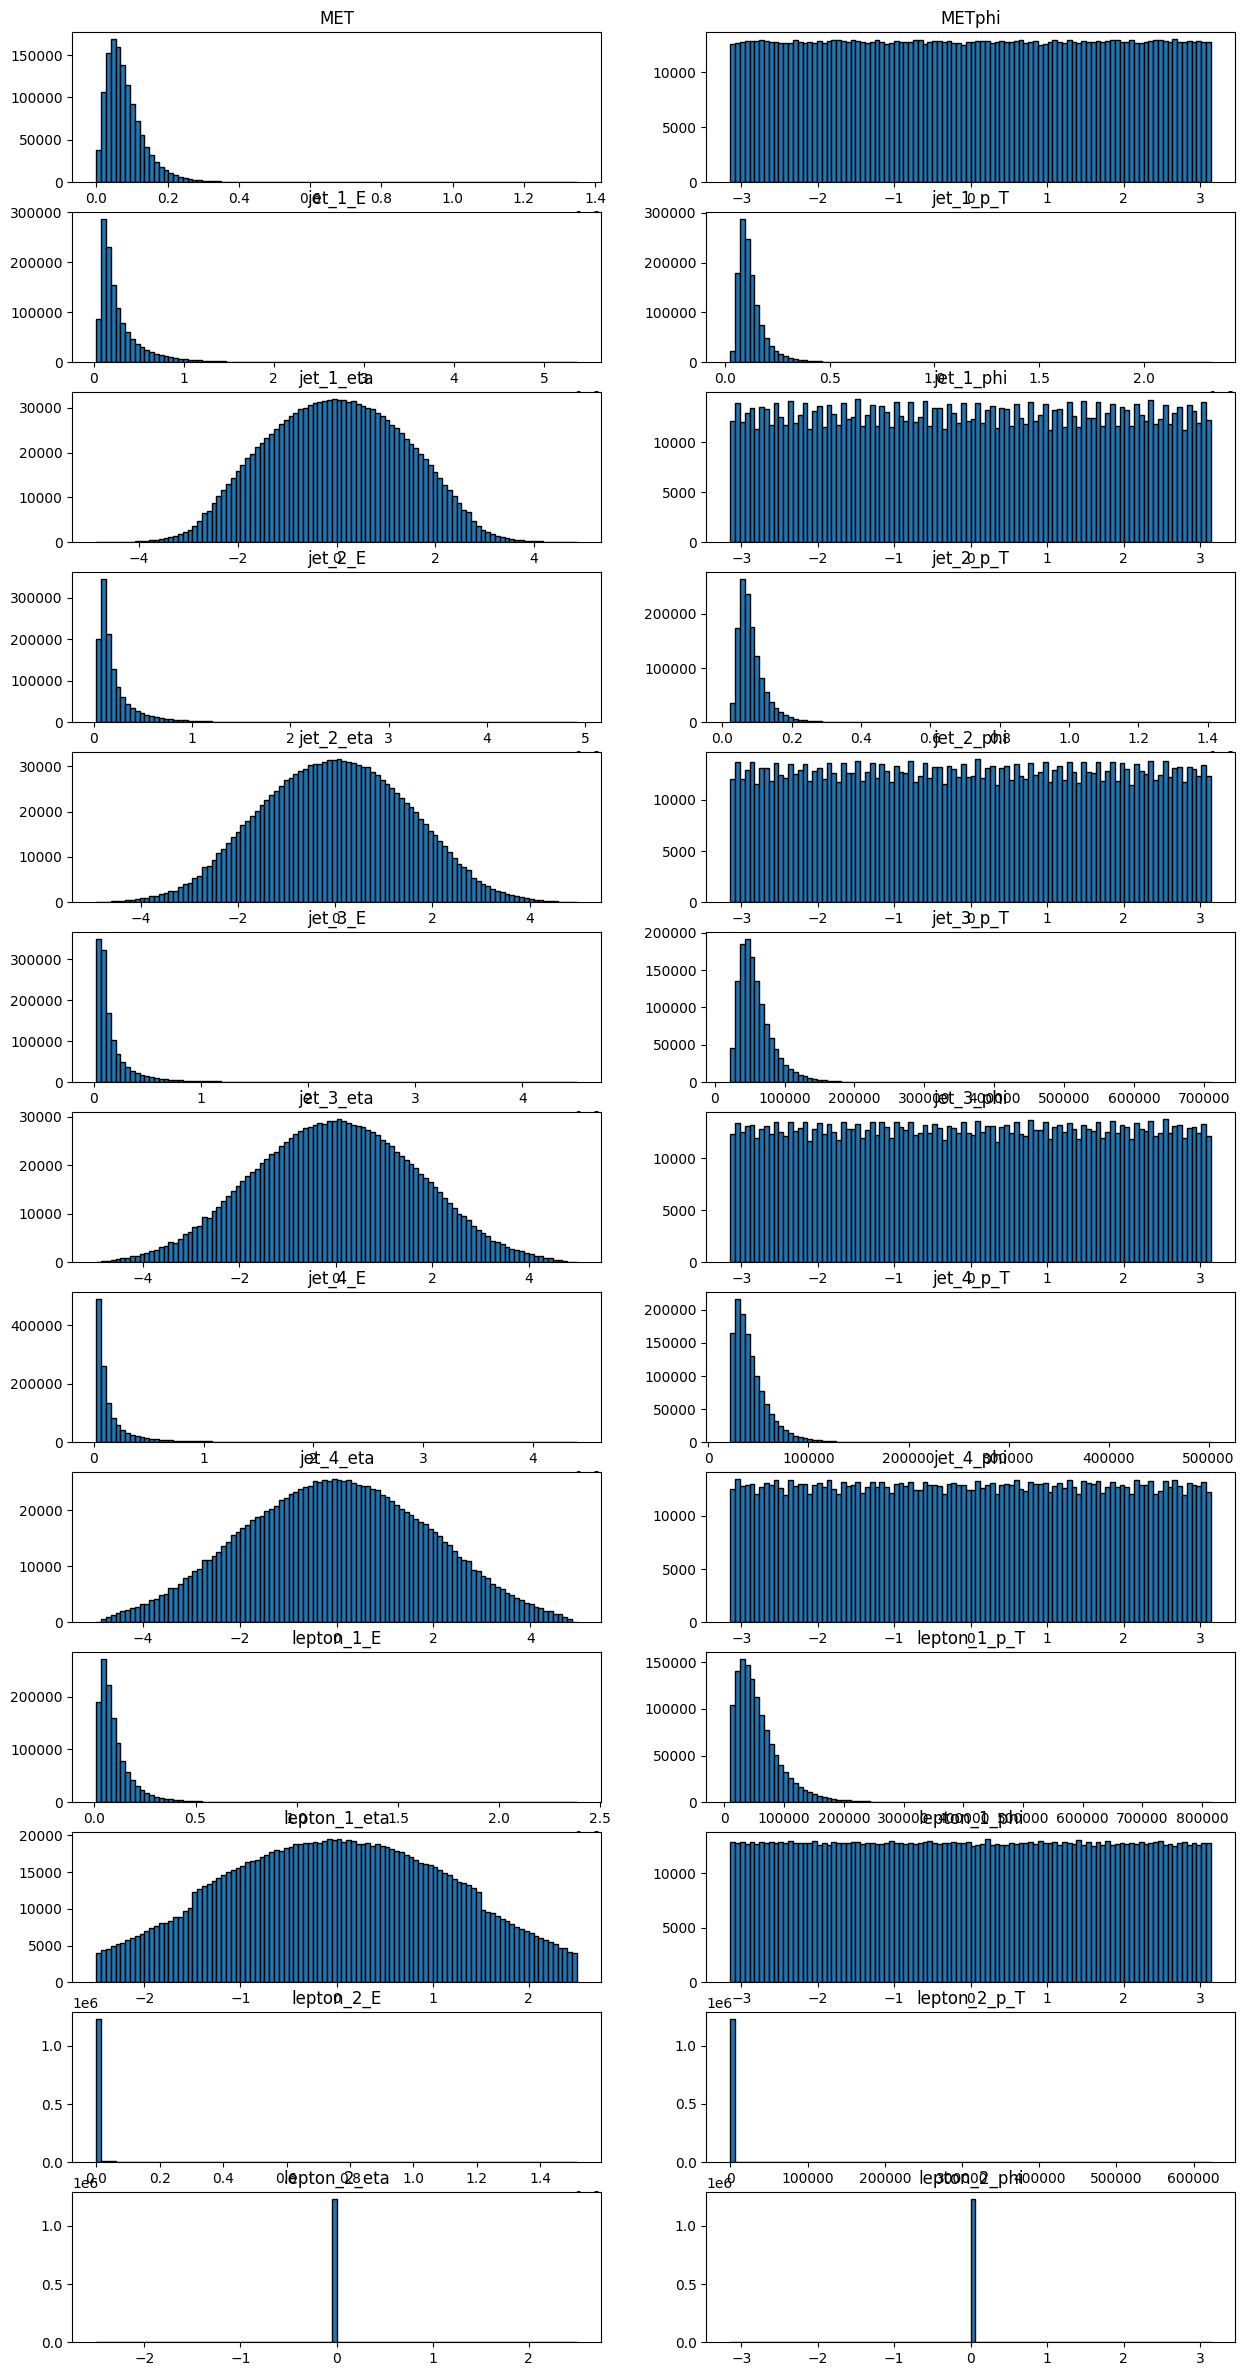

In [5]:
fig, axs = plt.subplots(data.shape[1] // 2, 2, figsize=(15, 30))
for i, col in enumerate(data.columns):
    ax = axs[i // 2, i%2]
    ax.hist(data[col], bins=100, edgecolor='black')
    ax.set_title(col)
plt.show()

The invariant mass of a system of particles is a key concept in particle physics, often used to identify particles and resonances in experiments like those conducted at the Large Hadron Collider (LHC). The invariant mass is calculated from the energy and momentum of the particles in the system and is the same in all frames of reference. Here's how you can calculate it for a system of four particles, given their transverse momentum ($p_T$), pseudorapidity ($\eta$), and azimuthal angle ($\phi$).

1. **Convert $p_T$, $\eta$, and $\phi$ to Cartesian Momenta:** 
   For each particle, you need to convert the given $p_T$, $\eta$, and $\phi$ into the Cartesian components of momentum ($p_x$, $p_y$, $p_z$). The formulas are:

   $$p_x = p_T \cos(\phi)$$
   $$p_y = p_T \sin(\phi)$$
   $$p_z = p_T \sinh(\eta)$$

2. **Calculate Energy:** 
   The energy of each particle can be found using the formula (assuming the particle is massless, which is a good approximation for high-energy particles like those in LHC):

   $$E = \sqrt{p_x^2 + p_y^2 + p_z^2} = \sqrt{p_T^2 + p_z^2}$$

3. **Sum Over All Particles:** 
   For a system of particles, sum the energy and momentum components separately:

   $$E_{\text{total}} = \sum E_i$$
   $$p_{x,\text{total}} = \sum p_{x,i}$$
   $$p_{y,\text{total}} = \sum p_{y,i}$$
   $$p_{z,\text{total}} = \sum p_{z,i}$$

4. **Calculate the Invariant Mass:** 
   Finally, the invariant mass $M$ of the system is given by:

   $$M^2 = E_{\text{total}}^2 - (p_{x,\text{total}}^2 + p_{y,\text{total}}^2 + p_{z,\text{total}}^2)$$
   $$M = \sqrt{E_{\text{total}}^2 - (p_{x,\text{total}}^2 + p_{y,\text{total}}^2 + p_{z,\text{total}}^2)}$$

   Note: The square of the invariant mass can be negative if the particles are not isolated but part of a jet or a bound system. In such cases, the invariant mass as a real number doesn't make physical sense.

This method assumes you have the necessary data for each of the four particles. In practical scenarios, especially in high-energy physics, these calculations are often done using specialized software due to the complexity and volume of the data.

In [6]:
for o in objects:
    data[f'{o}_x'] = data[f'{o}_p_T'] * np.cos(data[f'{o}_phi'])
    data[f'{o}_y'] = data[f'{o}_p_T'] * np.sin(data[f'{o}_phi'])
    data[f'{o}_z'] = data[f'{o}_p_T'] * np.sinh(data[f'{o}_eta'])

In [20]:
e_sum_sq = np.power(data[[c for c in data.columns if c.endswith('_E')]].sum(axis=1), 2)
x_sum_sq = np.power(data[[c for c in data.columns if c.endswith('_x')]].sum(axis=1), 2)
y_sum_sq = np.power(data[[c for c in data.columns if c.endswith('_y')]].sum(axis=1), 2)
z_sum_sq = np.power(data[[c for c in data.columns if c.endswith('_z')]].sum(axis=1), 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

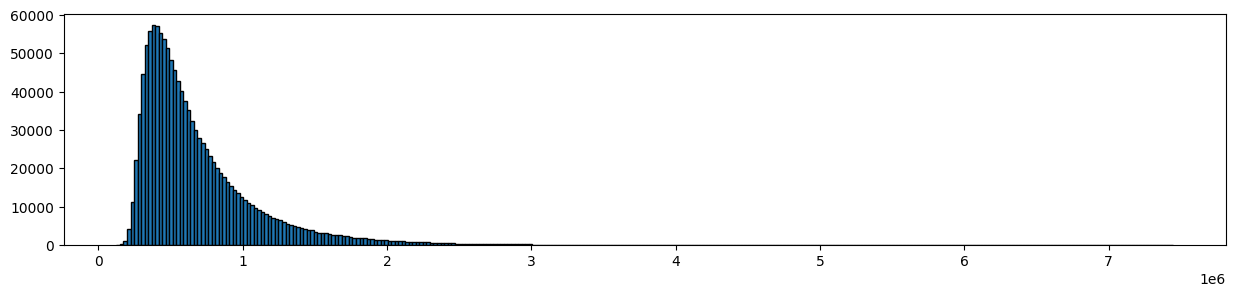

In [21]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=300, edgecolor='black')
plt.show()

# Generated dataset

In [11]:
columns = ['MET', 'METphi'] + [f'{o}_{f}' for o in objects for f in features]

In [12]:
gata = pd.read_csv('../B-VAE_events.csv', header=None, sep=' ', names=columns)
gata.shape

(1200000, 26)

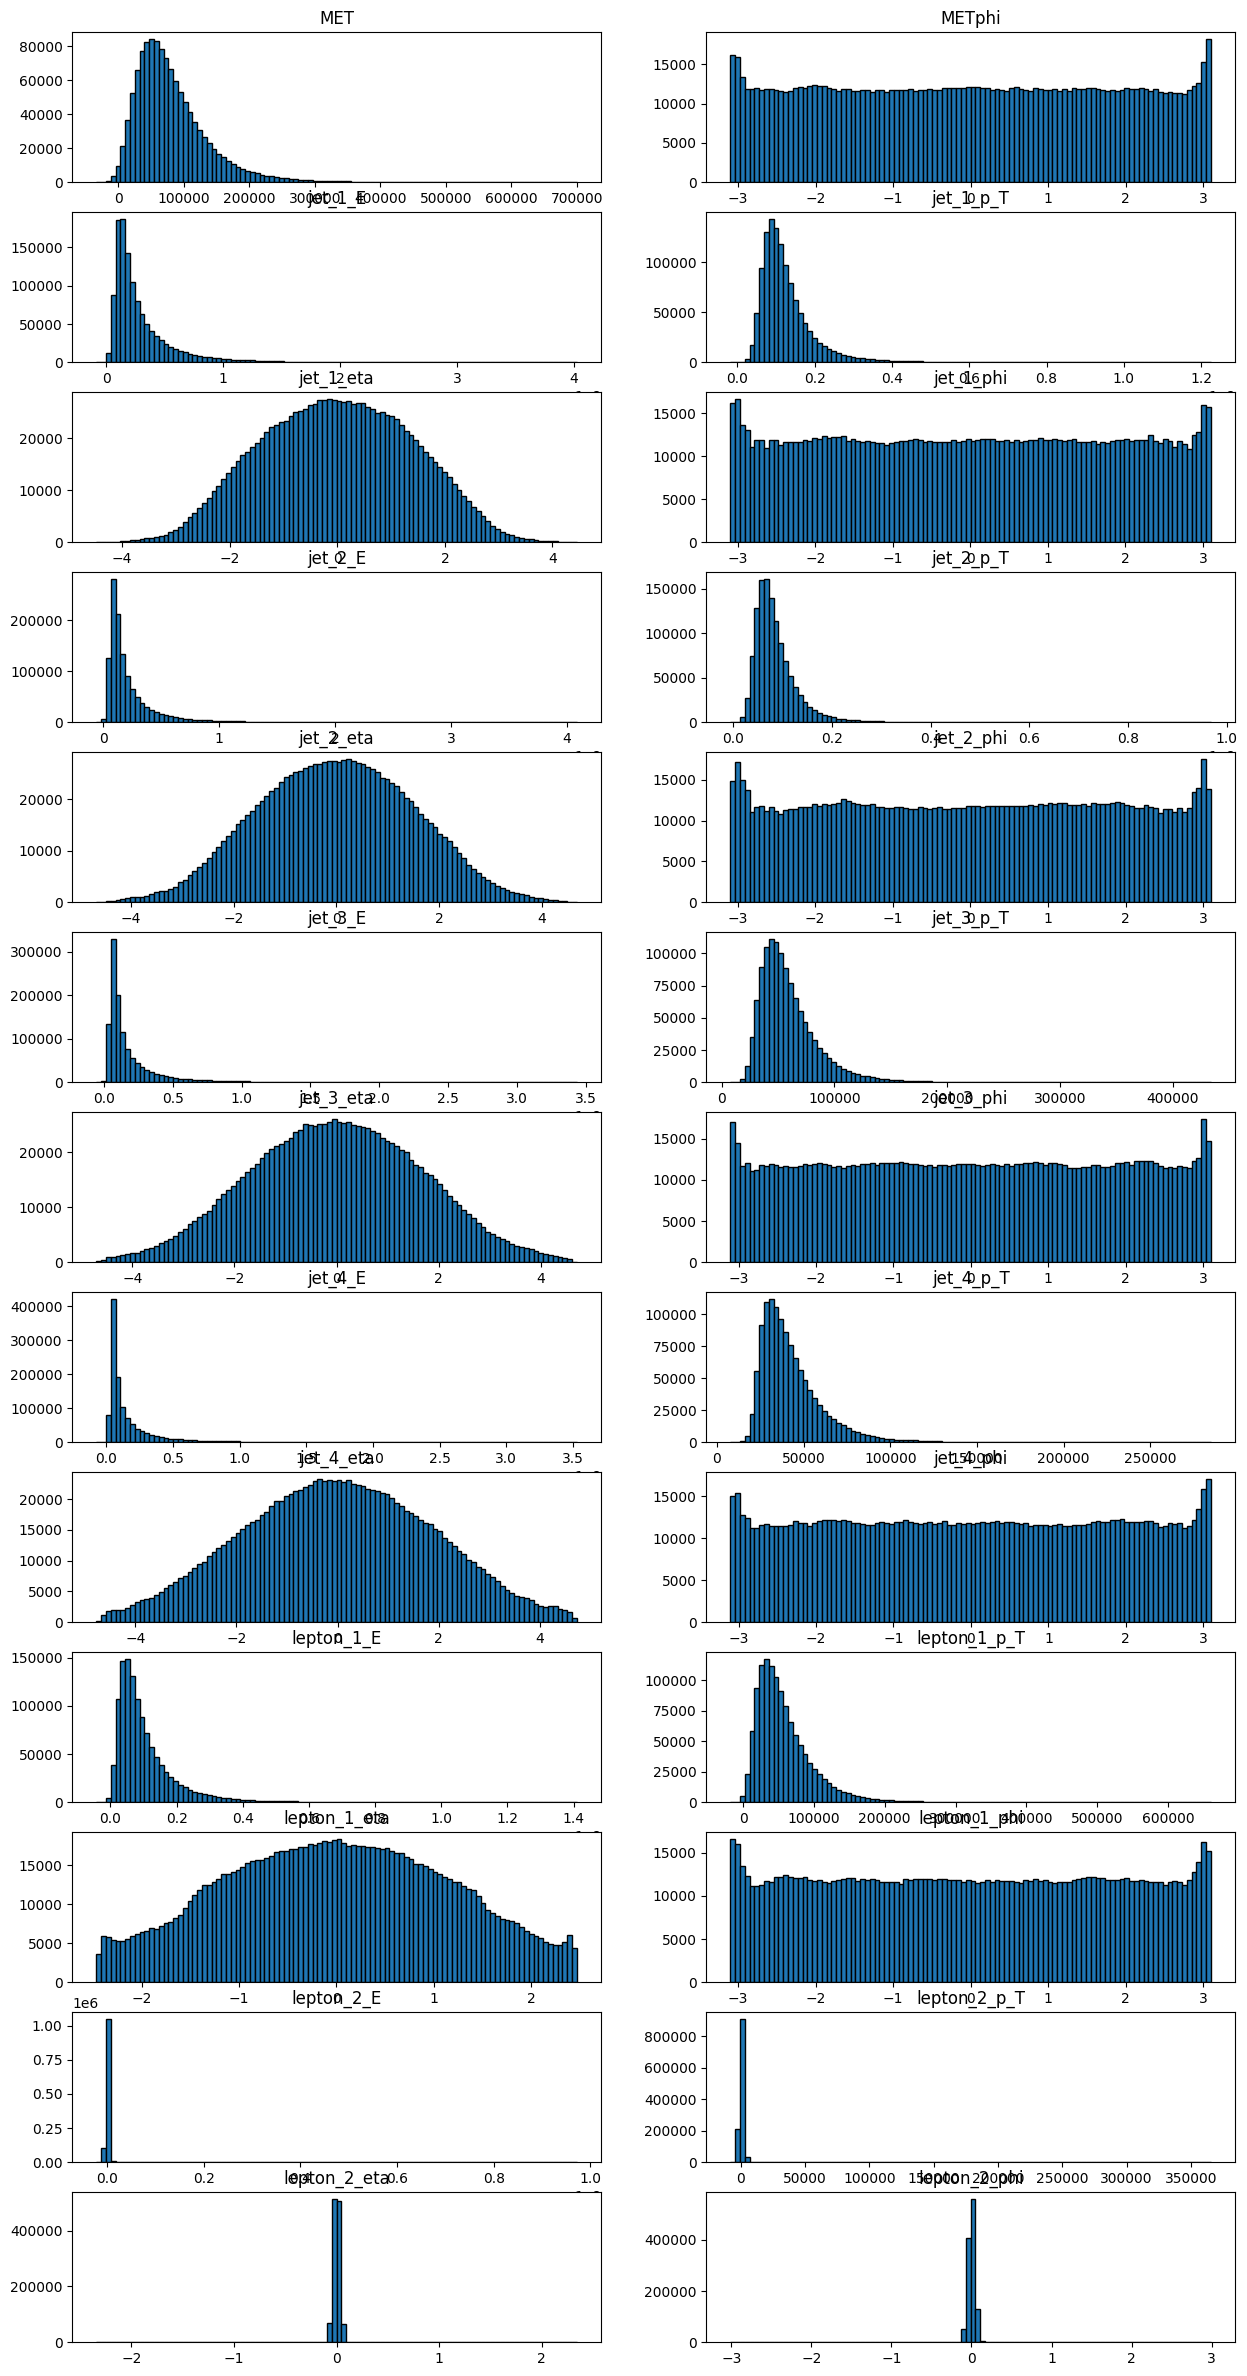

In [14]:
fig, axs = plt.subplots(gata.shape[1] // 2, 2, figsize=(15, 30))
for i, col in enumerate(gata.columns):
    ax = axs[i // 2, i%2]
    ax.hist(gata[col], bins=100, edgecolor='black')
    ax.set_title(col)
plt.show()

In [15]:
for o in objects:
    gata[f'{o}_x'] = gata[f'{o}_p_T'] * np.cos(gata[f'{o}_phi'])
    gata[f'{o}_y'] = gata[f'{o}_p_T'] * np.sin(gata[f'{o}_phi'])
    gata[f'{o}_z'] = gata[f'{o}_p_T'] * np.sinh(gata[f'{o}_eta'])

In [17]:
e_sum_sq = np.power(gata[[c for c in gata.columns if c.endswith('_E')]].sum(axis=1), 2)
x_sum_sq = np.power(gata[[c for c in gata.columns if c.endswith('_x')]].sum(axis=1), 2)
y_sum_sq = np.power(gata[[c for c in gata.columns if c.endswith('_y')]].sum(axis=1), 2)
z_sum_sq = np.power(gata[[c for c in gata.columns if c.endswith('_z')]].sum(axis=1), 2)
m_values_g = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

/home/valdo/.pyenv/versions/3.11.4/envs/event_simulator/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


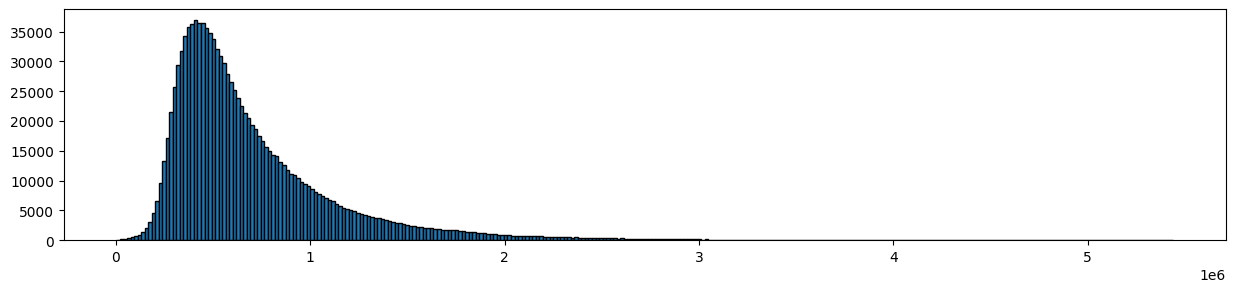

In [18]:
plt.figure(figsize=(15, 3))
plt.hist(m_values_g, bins=300, edgecolor='black')
plt.show()

# Comparison of M

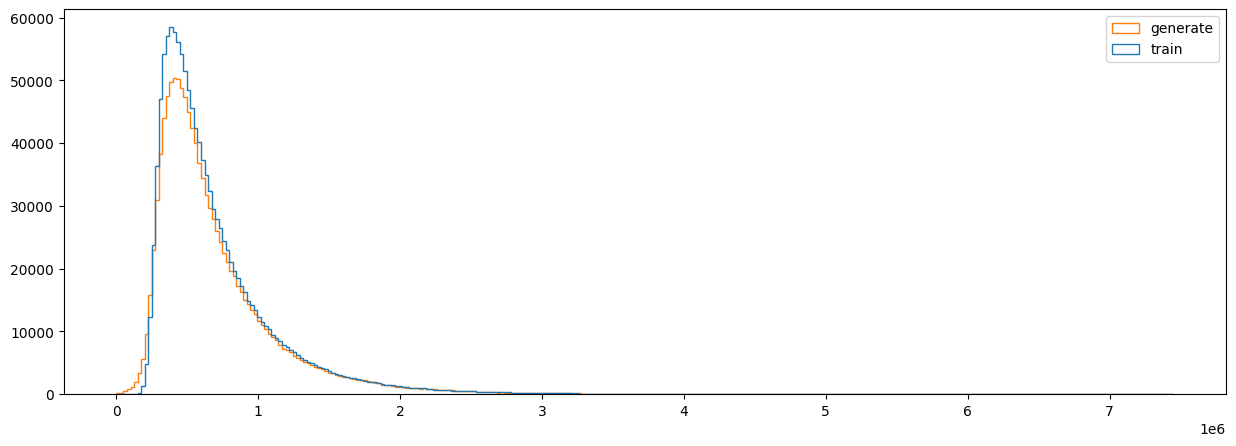

In [26]:
plt.figure(figsize=(15, 5))
plt.hist([m_values, m_values_g], bins=300, histtype='step', label=['train','generate'])
plt.legend()
plt.show()